## Import and Normalize Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Import Data
df2 = pd.read_csv('Data_grouped_by_date.csv', parse_dates=['date'], infer_datetime_format=True)
df2.drop(columns='date',inplace = True)

# Normalize and Log data
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

# Initilize 
pt = PowerTransformer()
ss = StandardScaler()

#Power Transform -> Silica Feed, Silica Concentrate, Total Level
#Standard Scaler -> Everthing else
pt_data = df2[['% Silica Feed', '% Silica Concentrate']] #'total level']]
ss_data = df2.drop(columns=['% Silica Feed','% Silica Concentrate']) #'total level'])

#fit_transform data
df2_pt = pd.DataFrame(pt.fit_transform(pt_data), columns = pt_data.columns)
df2_ss = pd.DataFrame(ss.fit_transform(ss_data), columns = ss_data.columns)

#combine data - df3 become normalized df2 data
df3 = pd.concat([df2_pt,df2_ss], axis=1)

## PCA - Plot Explanied Variance

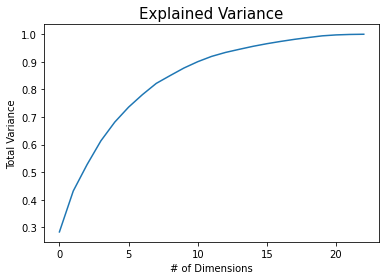

In [2]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df3)

exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

plt.plot(exp_var_cumul)
plt.title('Explained Variance',fontsize=15)
plt.xlabel('# of Dimensions')
plt.ylabel('Total Variance')
plt.show()

## PCA = 5

In [3]:
#create list to hold model results

Iron_R2 = []
Iron_MAE = []
Iron_MSE = []

Silica_R2 = []
Silica_MAE = []
Silica_MSE = []

## Poly Reg Model

### A) Predicting Iron Concentrate 

Train R2 Score: 0.256
MAE Score: 0.715
MSE Score: 0.821
Test R2 Score: 0.197


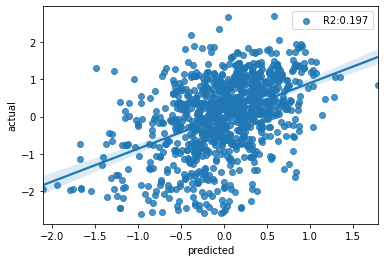

In [4]:
# create target variable
Y = df3['% Iron Concentrate']
X = df3.drop(columns=['% Iron Concentrate','% Silica Concentrate'])

# Apply PCA to train set
pca = PCA(n_components=15)
X = pca.fit_transform(X)

# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

#initialize and fit training dataset
model = make_pipeline(PolynomialFeatures(2),LinearRegression())
model.fit(X_train,y_train)

#make prediction 
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
Polyreg_model_R2_Iron = R2

#prints the model scores for your test dataset
print("Train R2 Score:", round(model.score(X_train,y_train),3))
print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

#make a graph for R2
graph = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
sns.regplot(x='predicted',y='actual',data=graph,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

#append scores in list
Iron_R2.append(R2)
Iron_MAE.append(MAE)
Iron_MSE.append(MSE)

### B) Predicting Silica Concentrate

Optimized Model Iron Concentrate
Train R2 Score: 0.256
MAE Score: 0.715
MSE Score: 0.821
Test R2 Score: 0.197


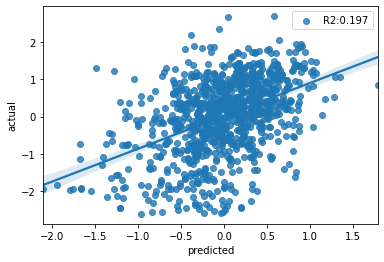

In [5]:
# create target variable
Y = df3['% Iron Concentrate']
X = df3.drop(columns=['% Iron Concentrate','% Silica Concentrate'])

# Apply PCA to train set
pca = PCA(n_components=15)
X = pca.fit_transform(X)

# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#initialize and fit training dataset
model = make_pipeline(PolynomialFeatures(2),LinearRegression())
model.fit(X_train,y_train)

#make prediction 
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
Polyreg_model_R2_Silica = R2

#prints the model scores for your test dataset
print("Optimized Model Iron Concentrate")
print("Train R2 Score:", round(model.score(X_train,y_train),3))
print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

#make a graph for R2
graph = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
sns.regplot(x='predicted',y='actual',data=graph,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

#append scores to list
Silica_R2.append(R2)
Silica_MAE.append(MAE)
Silica_MSE.append(MSE)

## Random Forest ModeL

### A) Predicting Iron Concentrate 

Train R2 Score: 0.903
MAE Score: 0.639
MSE Score: 0.684
Test R2 Score: 0.331


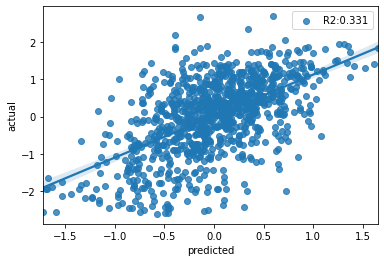

In [6]:
# create target variable
Y = df3['% Iron Concentrate']
X = df3.drop(columns=['% Iron Concentrate','% Silica Concentrate'])

# Apply PCA to train set
pca = PCA(n_components=15)
X = pca.fit_transform(X)

# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from sklearn.ensemble import RandomForestRegressor

#initialize and fit training dataset
model = RandomForestRegressor()
model.fit(X_train,y_train)

#make prediction 
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RandomForest_model_R2_Iron = R2

#prints the model scores for your test dataset
print("Train R2 Score:", round(model.score(X_train,y_train),3))
print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

#make a graph for R2
graph = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
sns.regplot(x='predicted',y='actual',data=graph,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

#append scores in list
Iron_R2.append(R2)
Iron_MAE.append(MAE)
Iron_MSE.append(MSE)

### B) Predicting Silica Concentrate 

Train R2 Score: 0.903
MAE Score: 0.645
MSE Score: 0.694
Test R2 Score: 0.321


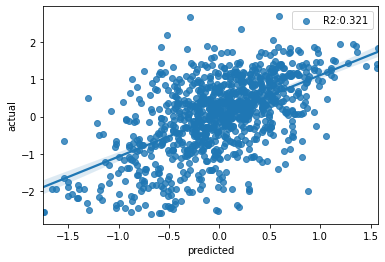

In [7]:
# create target variable
Y = df3['% Iron Concentrate']
X = df3.drop(columns=['% Iron Concentrate','% Silica Concentrate'])

# Apply PCA to train set
pca = PCA(n_components=15)
X = pca.fit_transform(X)

# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from sklearn.ensemble import RandomForestRegressor

#initialize and fit training dataset
model = RandomForestRegressor()
model.fit(X_train,y_train)

#make prediction 
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RandomForest_model_R2_Silica = R2

#prints the model scores for your test dataset
print("Train R2 Score:", round(model.score(X_train,y_train),3))
print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

#make a graph for R2
graph = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
sns.regplot(x='predicted',y='actual',data=graph,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

#append scores to list
Silica_R2.append(R2)
Silica_MAE.append(MAE)
Silica_MSE.append(MSE)

## Gradient Boosting Regressor ModeL

### A) Predicting Iron Concentrate 

Train R2 Score: 0.403
MAE Score: 0.702
MSE Score: 0.788
Test R2 Score: 0.229


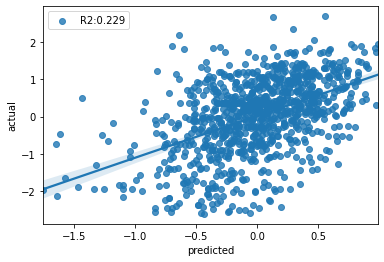

In [8]:
# create target variable
Y = df3['% Iron Concentrate']
X = df3.drop(columns=['% Iron Concentrate','% Silica Concentrate'])

# Apply PCA to train set
pca = PCA(n_components=15)
X = pca.fit_transform(X)

# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from sklearn.ensemble import GradientBoostingRegressor

#initialize and fit training dataset
model = GradientBoostingRegressor()
model.fit(X_train,y_train)

#make prediction 
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
GradientBoosting_model_R2_Iron = R2

#prints the model scores for your test dataset
print("Train R2 Score:", round(model.score(X_train,y_train),3))
print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

#make a graph for R2
graph = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
sns.regplot(x='predicted',y='actual',data=graph,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

#append scores in list
Iron_R2.append(R2)
Iron_MAE.append(MAE)
Iron_MSE.append(MSE)

### B) Predicting Silica Concentrate 

Train R2 Score: 0.403
MAE Score: 0.701
MSE Score: 0.786
Test R2 Score: 0.231


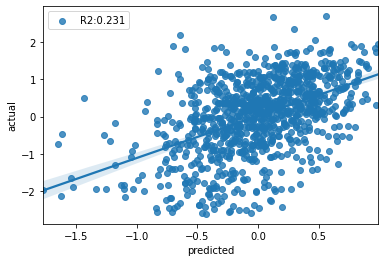

In [9]:
# create target variable
Y = df3['% Iron Concentrate']
X = df3.drop(columns=['% Iron Concentrate','% Silica Concentrate'])

# Apply PCA to train set
pca = PCA(n_components=15)
X = pca.fit_transform(X)

# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from sklearn.ensemble import GradientBoostingRegressor

#initialize and fit training dataset
model = GradientBoostingRegressor()
model.fit(X_train,y_train)

#make prediction 
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
GradientBoosting_model_R2_Silica = R2

#prints the model scores for your test dataset
print("Train R2 Score:", round(model.score(X_train,y_train),3))
print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

#make a graph for R2
graph = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
sns.regplot(x='predicted',y='actual',data=graph,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

#append scores to list
Silica_R2.append(R2)
Silica_MAE.append(MAE)
Silica_MSE.append(MSE)

## XGBoost Regressor ModeL

### A) Predicting Iron Concentrate 

Train R2 Score: 0.955
MAE Score: 0.686
MSE Score: 0.784
Test R2 Score: 0.233


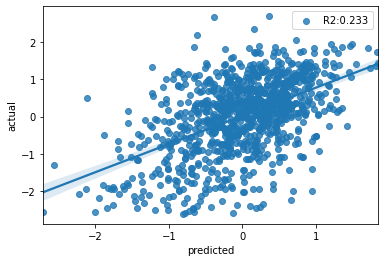

In [10]:
# create target variable
Y = df3['% Iron Concentrate']
X = df3.drop(columns=['% Iron Concentrate','% Silica Concentrate'])

# Apply PCA to train set
pca = PCA(n_components=15)
X = pca.fit_transform(X)

# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from xgboost import XGBRegressor

#initialize and fit training dataset
model = XGBRegressor()
model.fit(X_train,y_train)

#make prediction 
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
XGBoost_model_R2_Iron = R2

#prints the model scores for your test dataset
print("Train R2 Score:", round(model.score(X_train,y_train),3))
print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

#make a graph for R2
graph = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
sns.regplot(x='predicted',y='actual',data=graph,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

#append scores in list
Iron_R2.append(R2)
Iron_MAE.append(MAE)
Iron_MSE.append(MSE)

### B) Predicting Silica Concentrate 

Train R2 Score: 0.955
MAE Score: 0.686
MSE Score: 0.784
Test R2 Score: 0.233


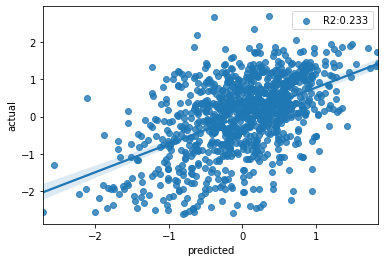

In [11]:
# create target variable
Y = df3['% Iron Concentrate']
X = df3.drop(columns=['% Iron Concentrate','% Silica Concentrate'])

# Apply PCA to train set
pca = PCA(n_components=15)
X = pca.fit_transform(X)

# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from xgboost import XGBRegressor

#initialize and fit training dataset
model = XGBRegressor()
model.fit(X_train,y_train)

#make prediction 
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
XGBoost_model_R2_Silica = R2

#prints the model scores for your test dataset
print("Train R2 Score:", round(model.score(X_train,y_train),3))
print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

#make a graph for R2
graph = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
sns.regplot(x='predicted',y='actual',data=graph,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

#append scores to list
Silica_R2.append(R2)
Silica_MAE.append(MAE)
Silica_MSE.append(MSE)

## SVR ModeL

### A) Predicting Iron Concentrate 

Train R2 Score: 0.366
MAE Score: 0.649
MSE Score: 0.743
Test R2 Score: 0.273


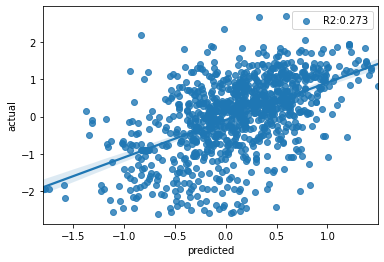

In [12]:
# create target variable
Y = df3['% Iron Concentrate']
X = df3.drop(columns=['% Iron Concentrate','% Silica Concentrate'])

# Apply PCA to train set
pca = PCA(n_components=15)
X = pca.fit_transform(X)

# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from sklearn.svm import SVR

#initialize and fit training dataset
model = SVR()
model.fit(X_train,y_train)

#make prediction 
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
SVR_model_R2_Iron = R2

#prints the model scores for your test dataset
print("Train R2 Score:", round(model.score(X_train,y_train),3))
print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

#make a graph for R2
graph = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
sns.regplot(x='predicted',y='actual',data=graph,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

#append scores in list
Iron_R2.append(R2)
Iron_MAE.append(MAE)
Iron_MSE.append(MSE)

### B) Predicting Silica Concentrate 

Train R2 Score: 0.366
MAE Score: 0.649
MSE Score: 0.743
Test R2 Score: 0.273


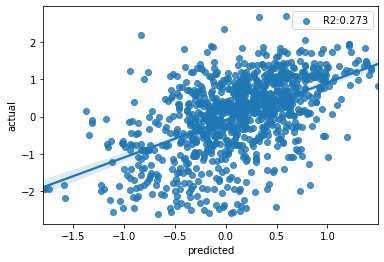

In [13]:
# create target variable
Y = df3['% Iron Concentrate']
X = df3.drop(columns=['% Iron Concentrate','% Silica Concentrate'])

# Apply PCA to train set
pca = PCA(n_components=15)
X = pca.fit_transform(X)

# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from sklearn.svm import SVR

#initialize and fit training dataset
model = SVR()
model.fit(X_train,y_train)

#make prediction 
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
SVR_model_R2_Silica = R2

#prints the model scores for your test dataset
print("Train R2 Score:", round(model.score(X_train,y_train),3))
print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

#make a graph for R2
graph = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
sns.regplot(x='predicted',y='actual',data=graph,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

#append scores to list
Silica_R2.append(R2)
Silica_MAE.append(MAE)
Silica_MSE.append(MSE)

## Model Results

In [14]:
# create a results table 
Iron_df = pd.DataFrame(
    {
        "Model": ['Polyreg_model','RandomForest_model','GradientBoosting_model','XGBoost_model', 'SVR_model'],
        "Iron_R2" : Iron_R2,
        "Iron_MAE" : Iron_MAE,
        "Iron_MSE" : Iron_MSE
    }

)


Silica_df = pd.DataFrame(
    {
        "Model": ['Polyreg_model','RandomForest_model','GradientBoosting_model','XGBoost_model', 'SVR_model'],
        "Silica_R2" : Silica_R2,
        "Silica_MAE" : Silica_MAE,
        "Silica_MSE" : Silica_MSE
    }

)

print('% Iron Concentrate Results')
display(Iron_df)

print('% Silica Concentrate Results')
display(Silica_df)

% Iron Concentrate Results


,Model,Iron_R2,Iron_MAE,Iron_MSE
0,Polyreg_model,0.197060,0.715287,0.820623
1,RandomForest_model,0.331085,0.639496,0.683647
2,GradientBoosting_model,0.229313,0.701750,0.787659
3,XGBoost_model,0.232630,0.686403,0.784270
4,SVR_model,0.272709,0.648910,0.743308


% Silica Concentrate Results


,Model,Silica_R2,Silica_MAE,Silica_MSE
0,Polyreg_model,0.197060,0.715287,0.820623
1,RandomForest_model,0.321430,0.645049,0.693514
2,GradientBoosting_model,0.231151,0.701105,0.785781
3,XGBoost_model,0.232630,0.686403,0.784270
4,SVR_model,0.272709,0.648910,0.743308
